# loading testing data

In [22]:
import csv
f_path = '/Users/eimanwaheed/Desktop/testingData.csv'

In [23]:
with open(f_path, 'r') as read_file:
    reader = csv.reader(read_file)
    i = 0
    for row in reader:
        print(row)

['NDVI_1', 'LAI_1']
['0.17441', '0.102']
['-0.02096', '-0.33302']
['0.74264', '2.30978']
['0.03036', '0.02521']
['0.37454', '0.58403']
['0.07606', '0.21569']
['0.18203', '0.16729']
['0.46933', '1.40631']
['0.04756', '-0.01995']
['0.53681', '1.65175']
['0.18367', '0.08557']
['0.01994', '-0.04355']
['0.30424', '0.92016']
['0.11816', '-0.12322']
['0.26894', '0.29586']
['0.1174', '-0.02738']
['0.08356', '-0.1048']
['0.04419', '0.07859']
['0.15765', '-0.00996']
['0.56043', '1.89156']
['0.39032', '0.66629']
['0.2867', '0.44713']
['0.04578', '-0.26373']
['0.02669', '-0.13715']
['0.46435', '1.2984']
['0.44268', '1.12008']
['0.03856', '0.10054']
['0.03674', '0.02921']
['0.6298', '2.06717']
['0.02749', '0.06346']
['0.18692', '0.14109']
['0.26601', '0.2755']
['0.25593', '0.30013']
['0.10857', '0.12438']
['0.052', '0.09702']
['0.02796', '-0.03299']
['0.56795', '1.61619']
['0.44288', '1.25115']
['0.4147', '0.96003']
['0.03435', '-0.11509']
['0.34118', '0.51226']
['0.30793', '0.25929']
['0.10977', '

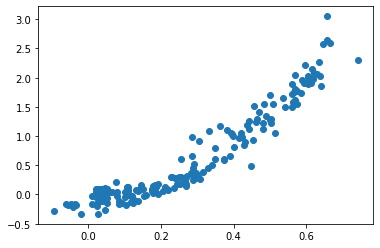

In [24]:
import csv
import numpy as np
from scipy.interpolate import *
from matplotlib.pyplot import *
from sklearn.linear_model import LinearRegression
from scipy.stats import *
%matplotlib inline
file = open(f_path)# opening the learning data
reader = csv.reader(file)# creating a reader
flag = 0# for avoiding the headers in csv file from including in arrays
dataLAI = np.array([]).reshape((1,-1))# stores the annual LAI data
dataNDVI =np.array([])# correspnding NDVI data

for i in reader:
    if flag==0: #removing headers
        flag=1
    else:
        dataNDVI= np.append(dataNDVI,float(i[0]))
        dataLAI = np.append(dataLAI,float(i[1]))


plot(dataNDVI,dataLAI,'o')

# load training data

In [25]:
import csv
f_path = '/Users/eimanwaheed/Desktop/trainingData.csv'

In [26]:
with open(f_path, 'r') as read_file:
    reader = csv.reader(read_file)
    i = 0
    for row in reader:
        print(row)

['NDVI_1', 'LAI_1']
['0.38772', '0.95603']
['0.10072', '0.06436']
['0.04191', '0.07891']
['0.29743', '0.86776']
['0.50313', '1.55927']
['0.04467', '-0.10029']
['0.41808', '0.9828']
['0.48247', '1.27252']
['0.03001', '-0.02172']
['0.03131', '0.05511']
['0.25471', '0.34119']
['0.58399', '1.68871']
['0.04892', '-0.09329']
['0.45242', '1.03731']
['0.44333', '1.02192']
['0.38807', '0.7922']
['0.0805', '-0.12856']
['0.15009', '0.08824']
['0.13636', '0.08996']
['0.03009', '0.07822']
['0.09257', '-0.02626']
['0.25459', '0.29622']
['0.06193', '-0.09478']
['0.64053', '2.20067']
['0.37698', '0.63029']
['0.3396', '0.53962']
['0.27782', '0.21197']
['0.02152', '-0.10569']
['0.3238', '0.44773']
['0.37862', '0.69015']
['0.04768', '-0.11124']
['0.25213', '-0.04595']
['0.21297', '0.16516']
['0.04511', '0.05017']
['0.03924', '0.07577']
['0.21057', '0.18621']
['0.04229', '-0.02016']
['0.56004', '1.81812']
['0.03283', '0.0338']
['0.02823', '0.05181']
['0.42519', '0.82235']
['-0.0713', '-0.19641']
['0.02722

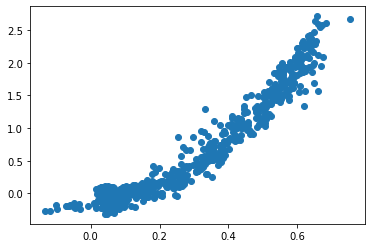

In [27]:
import csv
import numpy as np
from scipy.interpolate import *
from matplotlib.pyplot import *
from sklearn.linear_model import LinearRegression
from scipy.stats import *
%matplotlib inline
#import math
#set_printoptions(threshold= np.nan)
file = open(f_path)# opening the learning data
reader = csv.reader(file)# creating a reader
flag = 0# for avoiding the headers in csv file from including in arrays
trainingDataLAI = np.array([]).reshape((1,-1))# stores the annual LAI data
trainingDataNDVI =np.array([])# correspnding NDVI data

for i in reader:
    if flag==0: #removing headers
        flag=1
    else:
        trainingDataNDVI= np.append(trainingDataNDVI,float(i[0]))
        trainingDataLAI = np.append(trainingDataLAI,float(i[1]))


plot(trainingDataNDVI,trainingDataLAI,'o')

# building model

In [30]:
model = LinearRegression(fit_intercept=True)
# Fit the data(train the model)
model.fit(trainingDataNDVI[:,np.newaxis],trainingDataLAI)
y_pred =np.array([])
y_pred=model.predict(dataNDVI[:,np.newaxis])
y_pred
from sklearn.metrics import r2_score
print(r2_score(model.predict(dataNDVI[:,np.newaxis]), dataLAI))

0.8629483131844927


In [17]:
print("Actual LAI values"+"\t"+"Predicted LAI values")
for i in range(1,200):
    print(dataLAI[i],"\t\t\t",y_pred[i])

Actual LAI values	Predicted LAI values
-0.33302 			 0.40746546717734466
2.30978 			 1.6218556657510943
0.02521 			 0.7187721454661654
0.58403 			 0.7396933820472064
0.21569 			 -0.14028754049657288
0.16729 			 0.8680301303002579
1.40631 			 -0.17046303654474076
-0.01995 			 -0.16074606410425735
1.65175 			 0.02579336601168969
0.08557 			 1.6262183880713112
-0.04355 			 1.4648637640766173
0.92016 			 1.0609814401898574
-0.12322 			 0.8077452400572586
0.29586 			 0.3255983218199384
-0.02738 			 0.7879477349829404
-0.1048 			 -0.1266044568558921
0.07859 			 -0.1826257775586792
-0.00996 			 0.9513184655044015
1.89156 			 1.4580883241096134
0.66629 			 0.08135197374112041
0.44713 			 -0.1509629898104373
-0.26373 			 -0.40026612966950686
-0.13715 			 -0.10290694243471318
1.2984 			 -0.1543011334039367
1.12008 			 0.058381579706644315
0.10054 			 1.1179612377660253
0.02921 			 1.526933404359705
2.06717 			 -0.1267697114892337
0.06346 			 -0.16005199464422282
0.14109 			 -0.15896131406416855
0

# score of model

In [20]:
model.score(dataNDVI[:,np.newaxis],dataLAI)

0.8858173228320094